In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv('tmp.csv',sep = ',')

In [3]:
# checking the shape of the data(row, column)
train_data.shape

(18630, 9)

In [4]:
# checking the head of the data

train_data.head()

,file_name,width,height,depth,object_name,xmin,ymin,xmax,ymax
0,200801095.jpg,800,600,3,plastic_bag,22.0,422.0,210.0,550.0
1,200801097.jpg,800,600,3,plastic_bag,177.0,112.0,409.0,600.0
2,200801099.jpg,320,240,3,bucket,209.0,170.0,320.0,238.0
3,20080110.jpg,320,240,3,box,164.0,140.0,291.0,223.0
4,20080124.jpg,800,600,3,styrofoam,438.0,1.0,800.0,423.0


In [5]:
objkey = train_data['object_name'].value_counts().keys().tolist()
print(objkey)

['bucket', 'bowl', 'plastic_bag', 'tire', 'box', 'bottle', 'styrofoam', 'plate', 'water_tower', 'tub', 'toilet', 'aquarium', 'washing_machine']


In [6]:
transformation_obj = {
    "aquarium":1, "bottle":2, "bowl":3, "box":4, "bucket":5,
    "plastic_bag":6, "plate":7, "styrofoam":8, "tire":9,
    "toilet":10, "tub":11, "washing_machine":12, "water_tower":13
}
train_data['object_name'] = train_data['object_name'].map(transformation_obj)


In [7]:
#checking the NA values
train_data.isna().sum()

file_name       0
width           0
height          0
depth           0
object_name    55
xmin           55
ymin           55
xmax           55
ymax           55
dtype: int64

In [8]:
#checking the Null values in the dataset
train_data.isnull().sum()

file_name       0
width           0
height          0
depth           0
object_name    55
xmin           55
ymin           55
xmax           55
ymax           55
dtype: int64

In [9]:
train_data.dropna(inplace=True)
train_data.isna().sum()

file_name      0
width          0
height         0
depth          0
object_name    0
xmin           0
ymin           0
xmax           0
ymax           0
dtype: int64

In [10]:
# checking the head of the data after changing 'object_name' 

train_data.head()

,file_name,width,height,depth,object_name,xmin,ymin,xmax,ymax
0,200801095.jpg,800,600,3,6.0,22.0,422.0,210.0,550.0
1,200801097.jpg,800,600,3,6.0,177.0,112.0,409.0,600.0
2,200801099.jpg,320,240,3,5.0,209.0,170.0,320.0,238.0
3,20080110.jpg,320,240,3,4.0,164.0,140.0,291.0,223.0
4,20080124.jpg,800,600,3,8.0,438.0,1.0,800.0,423.0


In [11]:
train_data['object_name'].value_counts()

5.0     4996
3.0     2827
6.0     2667
9.0     2509
4.0     1410
2.0     1362
8.0      926
7.0      748
13.0     606
11.0     195
10.0     142
1.0      114
12.0      73
Name: object_name, dtype: int64

In [12]:
df_drop = train_data.drop(['file_name', 'object_name', 'depth'], axis=1)
df_drop.head()

,width,height,xmin,ymin,xmax,ymax
0,800,600,22.0,422.0,210.0,550.0
1,800,600,177.0,112.0,409.0,600.0
2,320,240,209.0,170.0,320.0,238.0
3,320,240,164.0,140.0,291.0,223.0
4,800,600,438.0,1.0,800.0,423.0


In [13]:
# Normalization
df_norm = (df_drop - df_drop.mean()) / df_drop.std()
df_norm.head()

,width,height,xmin,ymin,xmax,ymax
0,3.146421,2.958357,-1.179891,3.324104,-0.564850,3.271705
1,3.146421,2.958357,0.128995,-0.222743,1.053769,3.786653
2,-0.986739,-1.039668,0.399217,0.440861,0.329864,0.058427
3,-0.986739,-1.039668,0.019217,0.097618,0.093985,-0.096058
4,3.146421,2.958357,2.332991,-1.492742,4.234069,1.963736


In [14]:
from sklearn.decomposition import PCA

In [15]:
y = train_data['object_name'].values
y

array([6., 6., 5., ..., 9., 2., 5.])

In [16]:
arr = df_norm.values
arr

array([[ 3.14642128,  2.95835673, -1.17989137,  3.32410385, -0.56485001,
         3.27170472],
       [ 3.14642128,  2.95835673,  0.12899494, -0.22274251,  1.05376856,
         3.78665313],
       [-0.98673922, -1.03966825,  0.39921663,  0.44086101,  0.32986377,
         0.05842662],
       ...,
       [-0.29787914, -0.37333075, -0.51278157, -1.08085049,  0.15092102,
        -0.02396513],
       [-0.29787914, -0.37333075,  0.6018829 , -0.72616586,  0.15905478,
        -1.15685164],
       [-0.29787914, -0.37333075, -0.12433789, -0.21130107, -0.16629569,
        -0.02396513]])

In [17]:
pca = PCA(n_components=2)
arr_pca = pca.fit(arr).transform(arr)
arr_pca

array([[ 4.80464026,  4.24868259],
       [ 4.82651775,  1.31146939],
       [-0.54144731, -0.33612054],
       ...,
       [-0.82145939, -0.31529757],
       [-0.78095598, -1.29362065],
       [-0.51067796,  0.00485619]])

No handles with labels found to put in legend.


Text(0.5, 1.0, 'PCA of the dataset')

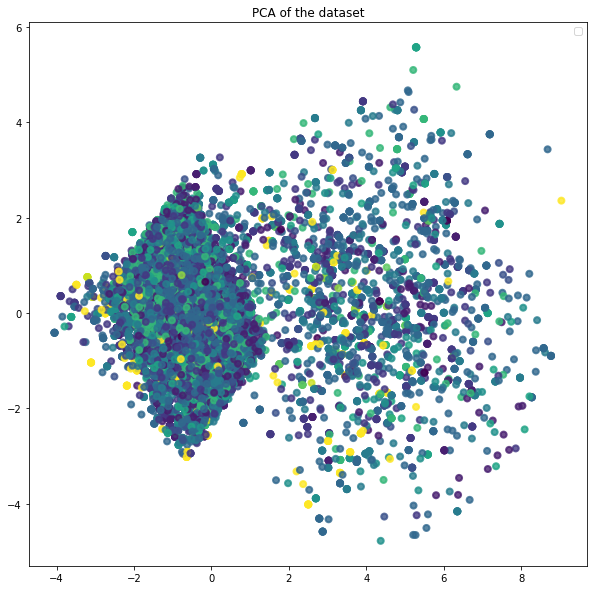

In [18]:
labels = ["aquarium", "bottle", "bowl", "box", "bucket",
          "plastic_bag", "plate", "styrofoam", "tire",
          "toilet", "tub", "washing_machine", "water_tower"]

plt.figure(figsize=(10, 10))
plt.scatter(arr_pca[:, 0], arr_pca[:, 1], c=train_data['object_name'], alpha=.8, lw=2)
plt.legend()
plt.title('PCA of the dataset')

Text(0.5, 1.0, 'PCA of the dataset')

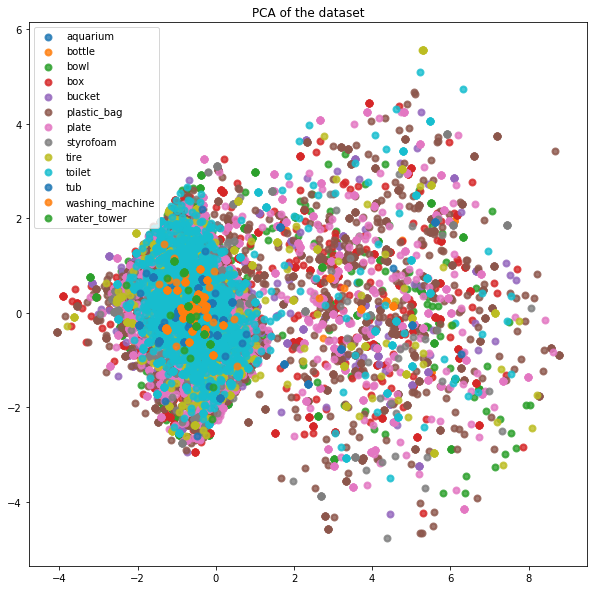

In [19]:
labels = ["aquarium", "bottle", "bowl", "box", "bucket",
          "plastic_bag", "plate", "styrofoam", "tire",
          "toilet", "tub", "washing_machine", "water_tower"]
colors = ['navy', 'turquoise', 'darkorange', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'coral', 'olive', 'teal']


plt.figure(figsize=(10, 10))
for color, i, la in zip(colors, range(13), labels):
    plt.scatter(arr_pca[y == i, 0], arr_pca[y == i, 1], alpha=.8, lw=2,
                label=la)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of the dataset')

In [20]:
group = train_data.groupby('object_name')


In [21]:
group.size()

object_name
1.0      114
2.0     1362
3.0     2827
4.0     1410
5.0     4996
6.0     2667
7.0      748
8.0      926
9.0     2509
10.0     142
11.0     195
12.0      73
13.0     606
dtype: int64

In [22]:
group.get_group(1.0).mean()

width          453.157895
height         342.719298
depth            3.000000
object_name      1.000000
xmin           104.254386
ymin            90.087719
xmax           337.692982
ymax           292.877193
dtype: float64